In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [282]:
df = pd.read_csv('./clean/cleaned_features.csv')
df.columns

Index(['Unnamed: 0', 'outcome', 'time', 'fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2', 'height_x', 'reach_x',
       'height_y', 'reach_y', 'weightclass_flw', 'weightclass_ftw',
       'weightclass_hw', 'weightclass_lhw', 'weightclass_lw', 'weightclass_mw',
       'weightclass_wbw', 'weightclass_wflw', 'weightclass_wsw',
       'weightclass_ww', 'round_2', 'round_3', 'round_4', 'round_5',
       'stance_x_Orthodox', 'stance_x_Southpaw', 'stance_x_Switch',
       'stance_y_Orthodox', 'stance_y_Southpaw', 'stance_y_Switch'],
      dtype='object')

In [283]:
df.head()

,Unnamed: 0,outcome,time,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_x,reach_x,height_y,...,round_2,round_3,round_4,round_5,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
0,0,0.0,300,5.0,5.0,0.200000,0.4,74.0,76.0,75.0,...,0,0,0,1,1,0,0,1,0,0
1,1,1.0,300,6.0,5.0,0.166667,0.4,73.0,76.0,75.0,...,0,0,0,1,1,0,0,1,0,0
2,2,0.0,292,5.0,5.0,0.400000,0.4,74.0,74.0,75.0,...,1,0,0,0,1,0,0,1,0,0
3,3,1.0,300,7.0,5.0,0.571429,0.4,72.0,77.0,75.0,...,0,1,0,0,1,0,0,1,0,0
4,4,0.0,300,1.0,5.0,1.000000,0.4,73.0,75.0,75.0,...,0,1,0,0,0,1,0,1,0,0


In [284]:
#We will not know the time at the time of prediction, so dropping it for now

df.drop(['Unnamed: 0','time'], axis=1, inplace=True)

In [285]:
#Creates y and X variables
y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
X = df.loc[:, df.columns != 'outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

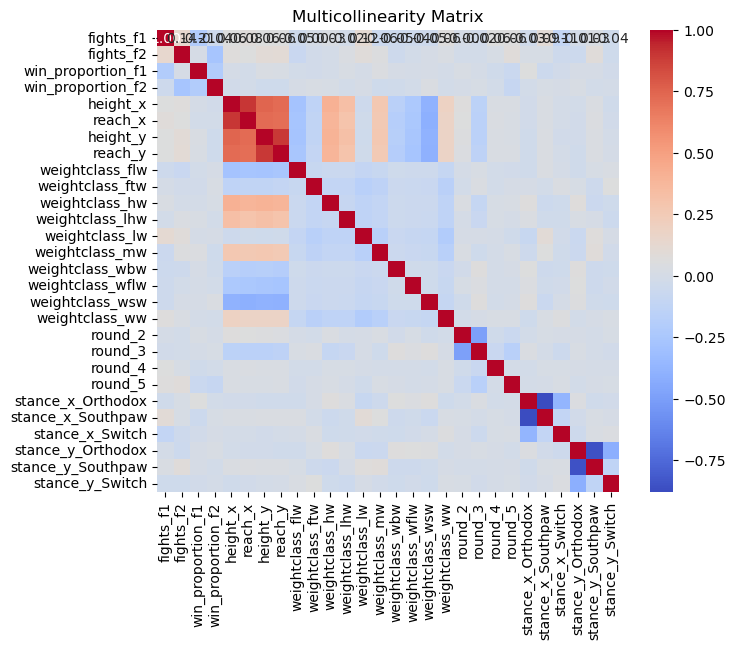

In [286]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Multicollinearity Matrix')
plt.show()

In [287]:
corr_matrix

,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_x,reach_x,height_y,reach_y,weightclass_flw,weightclass_ftw,...,round_2,round_3,round_4,round_5,stance_x_Orthodox,stance_x_Southpaw,stance_x_Switch,stance_y_Orthodox,stance_y_Southpaw,stance_y_Switch
fights_f1,1.000000,0.139250,-0.207912,-0.042247,0.058632,0.075715,0.058838,0.058304,-0.047860,0.001136,...,-0.003586,-0.022759,0.059074,0.061248,-0.030913,0.092075,-0.111707,-0.007817,0.030403,-0.036964
fights_f2,0.139250,1.000000,0.002233,-0.263210,0.072489,0.058032,0.096899,0.101173,-0.074927,-0.025352,...,-0.015410,-0.013920,0.010198,0.082746,0.013169,0.011035,-0.046716,-0.055644,0.081761,-0.035279
win_proportion_f1,-0.207912,0.002233,1.000000,-0.206528,-0.005026,-0.018928,0.026005,0.022630,-0.012643,-0.025867,...,0.020300,-0.001740,-0.033400,-0.068501,0.056355,-0.051284,-0.021506,0.004291,0.005925,-0.020316
win_proportion_f2,-0.042247,-0.263210,-0.206528,1.000000,-0.020228,-0.019242,-0.037060,-0.041899,0.007246,0.020138,...,-0.003102,0.010103,-0.013875,-0.086191,-0.016403,0.011558,0.009142,0.018251,-0.013338,-0.009549
height_x,0.058632,0.072489,-0.005026,-0.020228,1.000000,0.900189,0.745953,0.721210,-0.283307,-0.134926,...,0.062045,-0.152032,0.027946,0.026919,-0.023397,0.027393,-0.008114,-0.015852,0.035077,-0.031723
reach_x,0.075715,0.058032,-0.018928,-0.019242,0.900189,1.000000,0.725804,0.707168,-0.262330,-0.115959,...,0.059561,-0.153499,0.032272,0.020909,-0.022364,0.027073,-0.010533,-0.023562,0.040241,-0.025378
height_y,0.058838,0.096899,0.026005,-0.037060,0.745953,0.725804,1.000000,0.894521,-0.275853,-0.115786,...,0.046385,-0.154290,0.027877,0.019586,-0.028457,0.038316,-0.021119,-0.024616,0.031639,-0.008994
reach_y,0.058304,0.101173,0.022630,-0.041899,0.721210,0.707168,0.894521,1.000000,-0.261931,-0.108009,...,0.042796,-0.141358,0.026132,0.028192,-0.030480,0.036037,-0.012570,-0.029668,0.033035,-0.002207
weightclass_flw,-0.047860,-0.074927,-0.012643,0.007246,-0.283307,-0.262330,-0.275853,-0.261931,1.000000,-0.082387,...,-0.002692,0.022650,-0.014652,-0.022748,-0.029341,0.033673,-0.003204,-0.029783,0.015949,0.028808
weightclass_ftw,0.001136,-0.025352,-0.025867,0.020138,-0.134926,-0.115959,-0.115786,-0.108009,-0.082387,1.000000,...,-0.019724,0.037771,-0.014223,0.008425,0.002917,-0.018796,0.032482,0.016145,-0.048421,0.053655


In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42,max_features=None)
svm_clf = SVC(gamma="scale", random_state=42)

#Logistic regression coefficients
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print(log_clf.__class__.__name__, accuracy_score(y_test, y_pred))

#Random forest
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

#SVC
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred))

#Neural network

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(mlp_clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.820615796519411
RandomForestClassifier 0.786479250334672
SVC 0.8132530120481928
MLPClassifier 0.8192771084337349


In [289]:
import statsmodels.api as sm

#Log regression similar to glm in R
# Add a constant term for the intercept
X_train_orig = sm.add_constant(X_train_orig)
log_reg = sm.Logit(y_train, X_train_orig).fit(maxiter=2000) 

# printing the summary table 
print(log_reg.summary()) 
p_values=log_reg.pvalues
# Select significant features with p-values less than 0.05
significant_features = X_train_orig.columns[p_values < 0.05]

print("Significant features:")
print(significant_features)

Optimization terminated successfully.
         Current function value: 0.355069
         Iterations 789
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 3483
Model:                          Logit   Df Residuals:                     3454
Method:                           MLE   Df Model:                           28
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                  0.4792
Time:                        09:48:42   Log-Likelihood:                -1236.7
converged:                       True   LL-Null:                       -2374.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -32.1039   2.96e+06  -1.09e-05      1.000    -5.8e+06     5.8e+06
fights

Text(0, 0.5, 'Feature Importance')

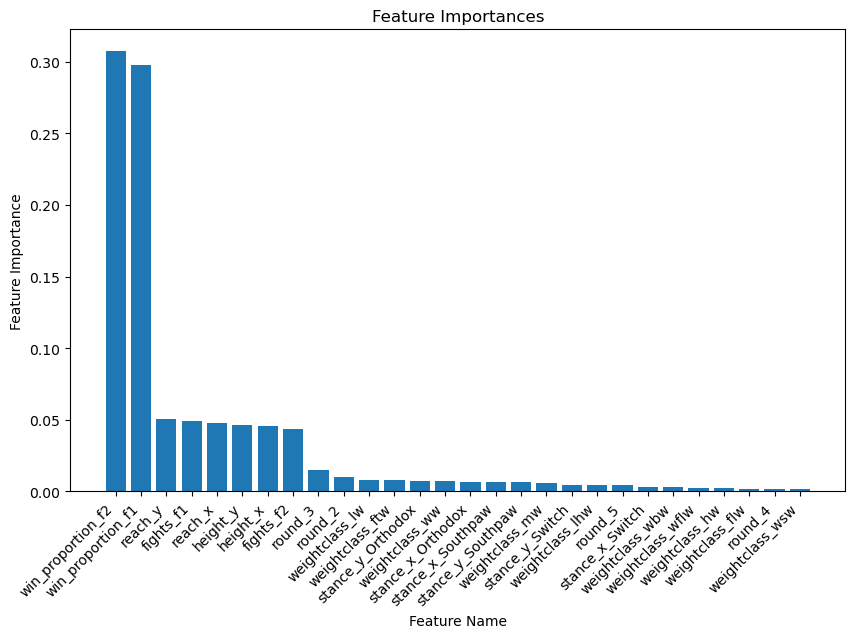

In [290]:
# Get feature importances from the trained model
feature_importances = rnd_clf.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort feature importances and names in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")

In [291]:
len(feature_importances)

28

In [292]:
lasso = Lasso(alpha = .0015)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

In [293]:
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for ls model is 0.47627944528933097
The test score for ls model is 0.456635420198114
